
# ICS - Travaux Pratiques 9

30.04.25


<font color=grey>_Ce 9e TP se concentre sur les différents algorithmes de recherche et de tri que nous avons vus en cours. Nous en profiterons pour aborder d'autres algorithmes similaire, ou de créer nos propres algorithmes sur la base d'instructions. Bien que cette série soit sous forme de Jupyter Notebook, vous devrez résoudre une partie des exercices sur papier._ 

_Note : ne vous sentez pas obligé.e.s de finir la série pendant la séance! Celle-ci est conçue de manière à ce que vous gardiez certains exercices pour vos révisions._ </font>

***

## Exercice 0 : Echauffement

Ordonner (sans justification) les fonctions suivantes par ordre de croissance, en
groupant ensemble les fonctions qui ont le même ordre de croissance. Vous pouvez
vérifier vos réponses en dessinant le graphes de ces fonctions à l'aide du module
`matplotlib` comme au TP précédent.

$$n \log_2 (n), \; (\log_2(n))^2, \; n, \; n^2, \; 2^n, \; 1000n^{10}, \; \sqrt{n}, \;
(\log_2(n^2)), \; \sqrt{n} \log_2 (n), \; \log_2 (n).$$


<font color=grey> S'aider des affirmations suivantes :
- Si $\lim_{n \rightarrow \infty}\frac{g(n)}{f(n)} = +\infty$ alors $f(n) = \mathcal{O}(g(n))$ 
- Si $\lim_{n \rightarrow \infty}\frac{f(n)}{g(n)} = 0$ alors  $f(n) = \mathcal{O}(g(n))$
</font>

***

## Exercice 1 : Recherche de la première occurence d'un nombre

On se propose d'écrire un algorithme qui prend en entrée une liste de nombres `L` **triée** et une valeur `x`, et retourne l'indice de la **première occurrence** de `x` dans la liste. Si aucun élément de valeur `x` n'est dans la liste, l'algorithme doit retourner `None`.

Par exemple, pour la liste `[10, 20, 20, 20, 20, 30, 30]` et la valeur `20` en entrée, l'algorithme doit retourner l'indice `1` (alors que `recherche_binaire` retournerait l'indice `3`).

- Implémentez en Python l'algorithme suivant, qui résoud ce problème:
	- Appeler `recherche_binaire(L, x)`
	- Si cet appel retourne un indice `i`, parcourir `L` en allant à gauche depuis `i` jusqu'à trouver un élément différent de `x` (ou jusqu'à arriver au début de la liste)
	- Retourner l'indice `i` de la première occurrence de `x` dans `L`.
    Quel est l'ordre de croissance du temps de parcours de cet algorithme au pire des cas, en fonction de la taille $n$ de la liste `L`?

- Donnez un autre algorithme qui résoud le même problème mais dont le temps de parcours au pire des cas est de l'ordre de $\log_2(n)$. <font color=grey> Pour cela, aidez-vous de la structure de l'algorithme de recherche binaire. Comment être sûr.e que le nombre trouvé est le premier nombre de la liste?</font>
- Utilisez la librarie `Matplotlib` pour comparer le temps de parcours de vos deux algorithmes sur des listes de taille $n$, pour $n$ de plus en plus grand. Vous pouvez utiliser des listes qui contiennent une même valeur répétée $n$ fois et rechercher la première occurrence de cette valeur (qui devrait être à l'indice `0`).

#### Point 1: `first_occ()`

In [1]:
def binary_search(lst, x):
    length = len(lst)
    top = length - 1
    bottom = 0
    while top >= bottom:
        mid = (top + bottom) // 2
        if x == lst[mid]:
            return mid
        elif x > lst[mid]:
            bottom = mid + 1
        else:
            top = mid - 1
    return None

In [2]:
def first_occ(lst, x):
    bin_index = binary_search(lst, x)
    if bin_index == None:
        return None
    # en partant vers la gauche
    j = x
    while j == x and bin_index >= 0:
        bin_index -= 1
        j = lst[bin_index]

    return bin_index + 1

print(binary_search([10, 20, 20, 20, 20, 30, 30], 20))
print(first_occ([10, 20, 20, 20, 20, 30, 30], 20))

3
1


Analysons la complexité temporelle, on s'attend à une complexité $\mathcal{O}(n)$ car, dans le pire des cas (liste remplie d'un seul élément), `binary_search()` sera appelée qu'une seule fois, et `first_occ()` parcoura la moitié de la liste en un temps `n`

*Note: `binary_search()` est de complexité $\mathcal{O}(log_{2}{n})$, donc le `n` venant de la complexité de `first_occ()` supplante $\log_{2}{n}$*

In [3]:
n_tests = 10000 # grows very slowly need n > 10000 to see anything

In [4]:
import matplotlib.pyplot as plt
import random as rd
import time as tm

times1 = []

for i in range(5, n_tests):
    rand_x = rd.randint(100, 200)

    ### "smart list" crafted to test the algorithm
    first_part = [rd.randint(0, 100) for _ in range(rd.randint(2, i // 2))]
    last_part = [rd.randint(200, 300) for _ in range(rd.randint(2, i // 2))]
    middle_part = [rand_x for j in range(i - len(first_part) - len(last_part))]
    temp_list = sorted(first_part + middle_part + last_part)

    ### worst case list
    # temp_list = [rand_x for j in range(i)]
    # print(temp_list)
    # print(rand_x)
    
    a = tm.time()
    first_occ(temp_list, rand_x)
    b = tm.time()

    times1.append(b - a)

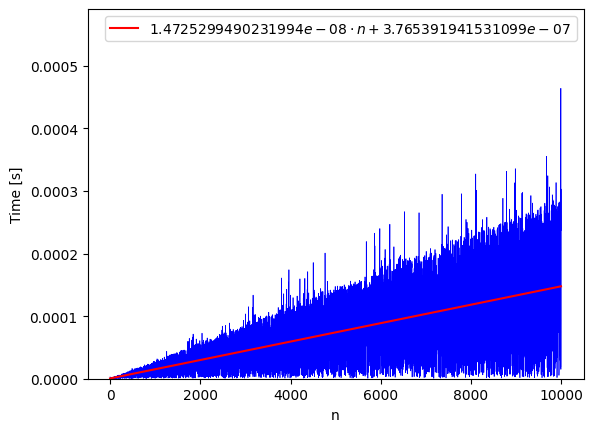

In [5]:
from scipy import stats

m, h, r_value, p_value, std_err = stats.linregress(range(5, n_tests), times1)
droite = [m * i + h for i in range(5, n_tests)]

plt.plot(times1, color='blue', linewidth=0.5)
plt.plot(droite, color='red', label=rf'${m}\cdot n+{h}$')
plt.ylim((0, droite[-1] * 4))
plt.xlabel('n')
plt.ylabel('Time [s]')
plt.legend()
plt.show()

#### Point 2 `search_first()`

In [6]:
def search_first(lst, x):
    length = len(lst)
    bas = 0
    haut = length - 1

    while haut >= bas:
        mid = (haut + bas) // 2
        if x == lst[mid]:
            if lst[mid - 1] != x or mid == 0:
                return mid
            else:
                haut = mid - 1
        elif x > lst[mid]:
            bas = mid + 1
        else:
            haut = mid - 1

    return None

In [7]:
print(search_first([10, 20, 20, 20, 20, 30, 30], 20))

1


On s'attend à du $log_{2}(n)$, c'est bien ce que l'on observe:

In [8]:
times2 = []

for i in range(5, n_tests):
    rand_x = rd.randint(100, 200)

    ### "smart list" crafted to test the algorithm
    first_part = [rd.randint(0, 100) for _ in range(rd.randint(2, i // 2))]
    last_part = [rd.randint(200, 300) for _ in range(rd.randint(2, i // 2))]
    middle_part = [rand_x for j in range(i - len(first_part) - len(last_part))]
    temp_list = sorted(first_part + middle_part + last_part)
    
    a = tm.time()
    search_first(temp_list, rand_x)
    b = tm.time()

    times2.append(b - a)

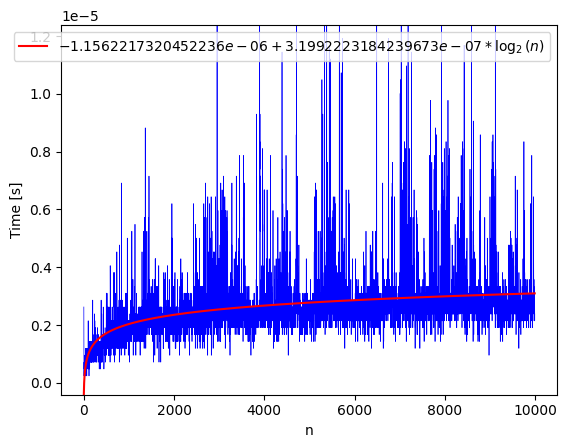

In [9]:
from scipy.optimize import curve_fit
import numpy as np

f = lambda x, a, b: a + b*np.log2(x)

popt, pcov = curve_fit(f, range(5, n_tests), times2)

log = [(a := popt[0]) + (b := popt[1])*np.log2(i) for i in range(5, n_tests)]

plt.plot(times2, color='blue', linewidth=0.5)
plt.plot(log, color='red', label=rf'${a}+{b}*\log_{2}(n)$')
plt.legend()
plt.xlabel('n')
plt.ylabel('Time [s]')
plt.ylim((log[0], 4*log[-1]))
plt.show()

#### Point 3

On voit que pour n suff. grand, `search_first()` performera mieux que `first_occ()`, simplement car $\lim_{n\to \infty}\frac{\log_{2}(n)}{n}=0$

***

## Exercice 2 : Fibonacci

En cours, nous avons présenté l'implémentation suivante d'un algorithme calculant le $N^e$ nombre de la suite de Fibonacci. 


In [10]:
def fib_rec(n):
    if n == 0:
        return 0
    if n == 1:
        return 1
    return fib_rec(n-1) + fib_rec(n-2)


Cet algorithme ayant un temps de parcours asymptotiquement exponentiel, nous souhaiterions l'améliorer. 

Réécrire l'algorithme précédent afin que sa complexité devienne linéaire $(\Theta(n))$.


     


<font color=grey>Indice : utilisez un algorithme itératif, et non pas récursif ! De quelles éléments de la suite avez-vous besoin pour construire l'élément</font> $f_n$?


In [11]:
def better_fib(n):
    if n == 0:
        return 0
    if n == 1:
        return 1

    lst = [0, 1]
    for i in range(n):
        next_n = lst[-1] + lst[-2]
        lst.append(next_n)
        lst = lst[-2:]
    
    return lst[-1]

#### Complexité temporelle

Comparons fib_rec() et better_fib()

In [12]:
n_tests = 30 # more would take wayy to long

In [13]:
rec_time = []
better_time = []

for i in range(n_tests):
    # recursive
    a = tm.time()
    fib_rec(i)
    b = tm.time()
    rec_time.append(b - a)

    # linear
    a = tm.time()
    better_fib(i)
    b = tm.time()
    better_time.append(b - a)

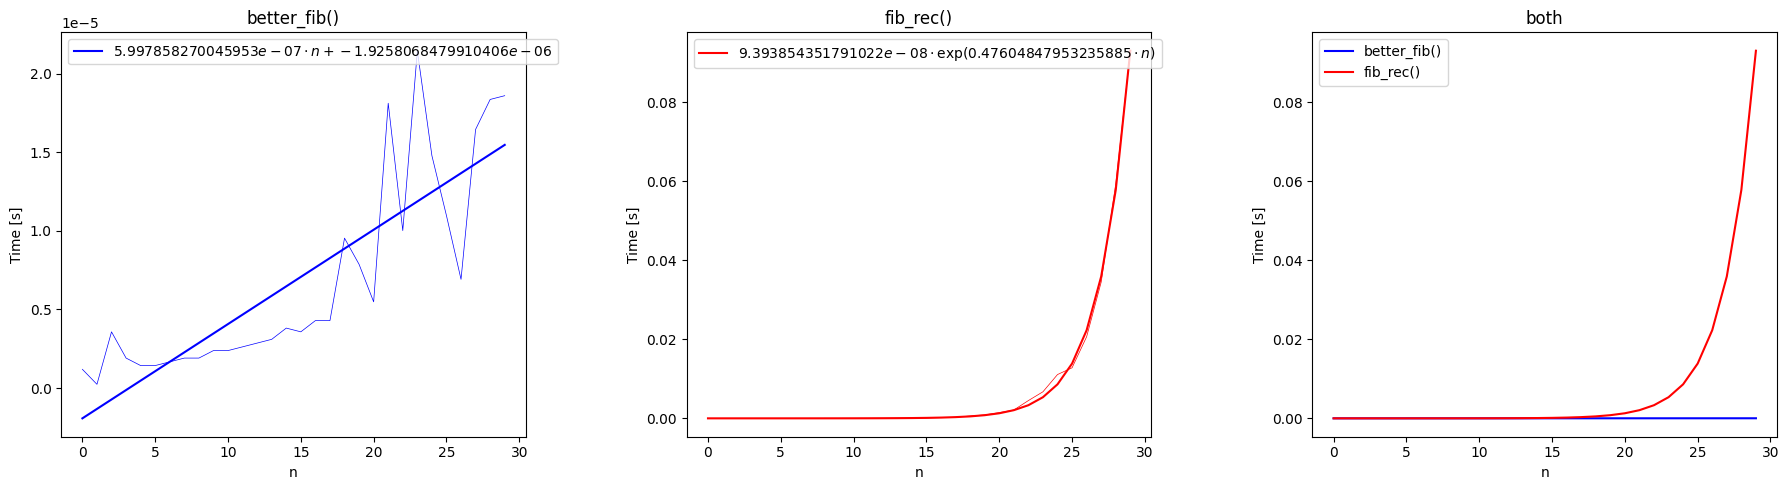

In [19]:
# better_fib
f = lambda x, a, b: a*x + b
popt, pcov = curve_fit(f, range(n_tests), better_time)
droite = [(m := popt[0]) * i + (h := popt[1]) for i in range(n_tests)]

# fib_rec
f = lambda x, a, b: a * np.exp(b * x)
popt, pcov = curve_fit(f, range(n_tests), rec_time)
exp = [(a := popt[0]) * np.exp((b := popt[1])*i) for i in range(n_tests)]


# plots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# better_fib
axs[0].plot(better_time, color='blue', linewidth=0.5)
axs[0].plot(droite, color='blue', label=rf'${m}\cdot n + {h}$')
axs[0].set_title("better_fib()")
axs[0].set_xlabel('n')
axs[0].set_ylabel('Time [s]')
axs[0].legend(loc='upper left')

# fib_rec
axs[1].plot(rec_time, color='red', linewidth=0.5)
axs[1].plot(exp, color='red', label=rf'${a}\cdot \exp({b}\cdot n)$')
axs[1].set_xlabel('n')
axs[1].set_ylabel('Time [s]')
axs[1].set_title('fib_rec()')
axs[1].legend(loc='upper left')

# both
axs[2].plot(droite, color='blue', label="better_fib()")
axs[2].plot(exp, color='red', label="fib_rec()")
axs[2].set_xlabel('n')
axs[2].set_ylabel('Time [s]')
axs[2].set_title("both")
axs[2].legend(loc='upper left')

plt.tight_layout()
plt.show()

***

## Exercice 3 : compréhension des algorithmes de tri

- Simulez à la main le parcours de `tri_par_selection` sur la liste ci-dessous en affichant le contenu de la liste à la fin de chaque itération de la boucle `for` extérieure. Vérifiez votre réponse en  appelant `tri_par_selection` sur la liste en entrée dans la cellule ci-dessous (et en insérant une instruction `print` dans le code).

    Essayez d'implémenter l'algorithme sans utiliser vos notes de cours!
	
    `[7, 2, 13, -5, -3, 17, 8, 24, -11, 1]`
	
- Même question pour `tri_par_insertion`.

In [22]:
def selection_sort(lst):
    length = len(lst)

    for i in range(length):
        min_value = lst[i]
        min_index = i
        
        for j in range(i + 1, length):
            if lst[j] < min_value:
                min_value = lst[j]
                min_index = j

        lst[i], lst[min_index] = lst[min_index], lst[i]

    return lst

In [23]:
print(selection_sort([7, 2, 13, -5, -3, 17, 8, 24, -11, 1]))

[-11, -5, -3, 1, 2, 7, 8, 13, 17, 24]


In [27]:
def insertion_sort(lst):
    length = len(lst)

    for i in range(length):
        j = i
        
        while j > 0 and lst[j] < lst[j - 1]:
            lst[j], lst[j - 1] = lst[j - 1], lst[j]
            j -= 1
    
    return lst

In [28]:
print(insertion_sort([7, 2, 13, -5, -3, 17, 8, 24, -11, 1]))

[-11, -5, -3, 1, 2, 7, 8, 13, 17, 24]


***

## Exercice 4 : tri à bulles

Le **tri à bulles** (bubble sort) fonctionne de la manière suivante:

Il prend en entrée une liste `L` de taille $n$. Il parcourt la liste $n$ fois. A chaque parcours, dès qu'il rencontre deux éléments adjacents de la liste qui sont dans le mauvais ordre, c'est-à-dire `L[i], L[i+1]` tels que `{L[i] > L[i+1]`, il les échange.

On appelle cet algorithme tri à bulles car à chaque parcours de la liste, le plus grand élément (restant) se déplace vers la fin de la liste comme une bulle qui remonte à la surface de l'eau.

- Observez une simulation du tri à bulles sur l'un des sites proposés en cours, par exemple https://visualgo.net/bn/sorting, pour comprendre exactement comment fonctionne l'algorithme.
- Donnez l'algorithme du tri à bulles en Python. N'oubliez pas de tester votre code sur de petites listes.
- Quel est le temps de parcours du tri à bulles?


In [51]:
def bubble_sort(lst):
    length = len(lst)
    
    while True:
        switch_count = 0
        
        for i in range(length - 1):
            if lst[i + 1] < lst[i]:
                lst[i], lst[i + 1] = lst[i + 1], lst[i]
                switch_count += 1

        if switch_count == 0:
            return lst

In [52]:
print(bubble_sort([7, 2, 13, -5, -3, 17, 8, 24, -11, 1]))

[-11, -5, -3, 1, 2, 7, 8, 13, 17, 24]


Cet algorithme a une complexité temporelle $\mathcal{O}(n^{2})$

***

## Exercice 5 : exercice d'examen

<font color=greblueen> Chaque semaine, je vous propose un exercice sans corrigé détaillé mais en vous indiquant la réponse finale. Ce sera donc à vous de faire l'effort de résoudre ce problème à l'aide des ressources à disposition : vos notes de cours, les forums sur internet ou même ChatGPT du moment que vous faites l'effort de comprendre le code que vous fournit ce Chatbot! 

Pour résoudre cet exercice, je vous conseille de discuter avec vos camarades.</font>

On donne ci-dessous un algorithme de tri, auquel nous avons rajouté l’instruction
`print(f"{i}e element: {L}")`.

In [61]:
def mafonction(L):
    n = len(L)
    for i in range(n-1,-1,-1):
        j = i
        while j < n-1 and L[j] > L[j+1]:
            L[j], L[j+1] = L[j+1], L[j]
            j += 1
        print (f"{i}e element : {L}")
    return L

In [62]:
print(mafonction([1, 3, 0, -6, 100, -1]))

5e element : [1, 3, 0, -6, 100, -1]
4e element : [1, 3, 0, -6, -1, 100]
3e element : [1, 3, 0, -6, -1, 100]
2e element : [1, 3, -6, -1, 0, 100]
1e element : [1, -6, -1, 0, 3, 100]
0e element : [-6, -1, 0, 1, 3, 100]
[-6, -1, 0, 1, 3, 100]


- Sans exécuter ce code, saurez-vous dire qu'affichent les instructions suivantes?

    `L = [1, 3, 0, -6, 100 , -1]`

    `mafonction (L)`

- Quel algorithme vu en cours fonctionne selon le même principe que celui-ci?

- Quel est le temps de parcours de `mafonction()`? Justifiez brièvement votre réponse et
utilisez la notation de Landau.

- Quelle propriété satisfait l'instance pour laquelle le temps de parcours est minimal?
	Que vaut celui-ci dans le meilleur des cas? Justifiez brièvement votre réponse et utilisez la notation de Landau.

Réponses:
  - C'est come le tri par insertion mais en parcourant à l'envers
  - Dans le worst-case scenario: $\mathcal{O}(n^{2})$ 
  - Le temps de parcours est minimal si la liste est déjà triée, la complexité est alors: $\mathcal{O}(n)$